In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from utils.arch.anomalies import shock_mean_fn, shock_volatility_fn, perturbed_mean_fn, increasing_volatility_fn, constant_mean
from utils.simulate_markov import simulate_arch_1_process, simulate_arch1_process_with_dynamic_anomaly

In [2]:
# Set up the Seaborn style
sns.set(style="whitegrid")

In [3]:
# Fix the random seed for reproducibility 
random_seed = 7
np.random.seed(random_seed)

In [4]:
# Number of steps on each trajectory
n_steps = 200
# Number of normal trajectories to simulate
M = 100
# Number of anomalous trajectories to simulate
A = 100

# Size of the chock
ANOMALY_SHOCK_SIZE = 2
# Size of the anomalous part (percent of the total length)
ANOMALY_SIZE = 0.75

In [5]:
# Parameters of the ARCH(1) process
INITIAL_VALUE = 0.5

def mean_fn(x):
    return 1 / (1 + np.exp(-x))

def volatility_fn(x):
    return norm.pdf(x + 1.2) + 1.5 * norm.pdf(x - 1.2)

In [6]:
# Simulate regular  ARCH(1) processes of the same length
random_seed +=1
regular_arch_trajectories = simulate_arch_1_process(
    n_steps=n_steps, 
    m=mean_fn, 
    sigma=volatility_fn, 
    initial_value=INITIAL_VALUE, 
    num_processes=M, 
    seed=random_seed
)

## Model 1 (Shock anomaly)

In [7]:
random_seed +=1
anomalous_shock_arch_trajectories = simulate_arch1_process_with_dynamic_anomaly(
    n_steps=n_steps, 
    m=mean_fn, 
    sigma=volatility_fn, 
    anomalous_m=shock_mean_fn,
    anomalous_sigma=shock_volatility_fn,
    initial_value=INITIAL_VALUE, 
    num_processes=A, 
    anomaly_size=ANOMALY_SHOCK_SIZE,
    seed=random_seed,
)

/Users/carlos/work/Post-Doc/Statistical depth/depth_markov/utils/arch/anomalies.py:10: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(x)


We plot the regular trajectories and the anomalous trajectories in the same plot.

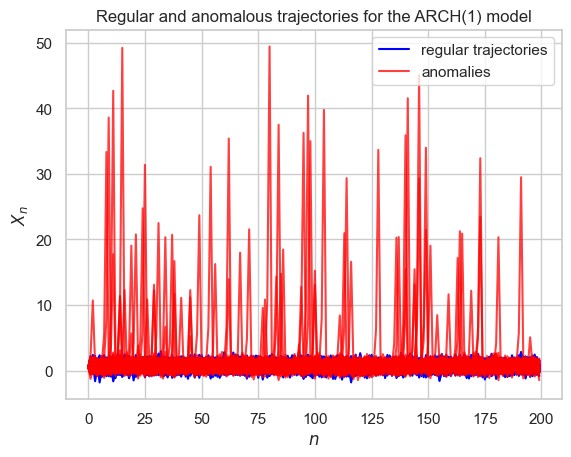

In [8]:
# Plot regular trajectories
for i, trajectory in enumerate(regular_arch_trajectories):
    if i == 0:
        plt.plot(trajectory, color="blue", label="regular trajectories")
    else:
        plt.plot(trajectory, color="blue")

for i, trajectory in enumerate(anomalous_shock_arch_trajectories):
    if i == 0:
        plt.plot(trajectory, color="red", label="anomalies", alpha=0.75)
    else:
        plt.plot(trajectory, color="red", alpha=0.75)
plt.title("Regular and anomalous trajectories for the ARCH(1) model")
plt.legend()
plt.xlabel(r"$n$")
plt.ylabel(r"$X_n$")
plt.show()

We select one anomalous trajectory to plot it alongside the regular trajectories.

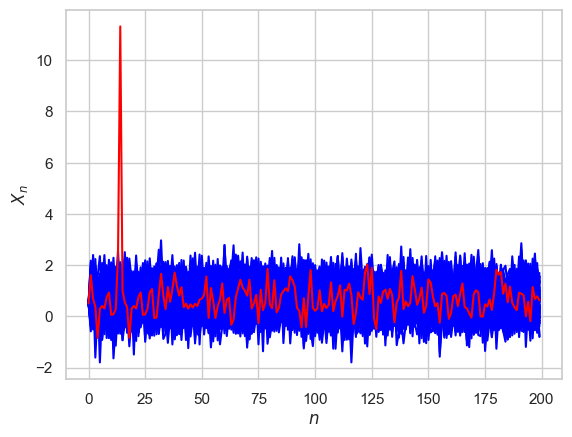

In [9]:
# Plot regular trajectories
for i, trajectory in enumerate(regular_arch_trajectories):
    plt.plot(trajectory, color="blue")

plt.plot(anomalous_shock_arch_trajectories[1], color="red", alpha=1)

plt.xlabel(r"$n$")
plt.ylabel(r"$X_n$")
plt.show()

## Model 2 (Perturbed mean)

In [10]:
# Simulate anomalous process
random_seed +=1
anomalous_perturbed_mean_arch_trajectories = simulate_arch1_process_with_dynamic_anomaly(
    n_steps=n_steps, 
    m=mean_fn, 
    sigma=volatility_fn, 
    anomalous_m=perturbed_mean_fn,
    anomalous_sigma=volatility_fn,
    initial_value=INITIAL_VALUE, 
    num_processes=A,
    seed=random_seed,
    anomaly_size=ANOMALY_SIZE,
)

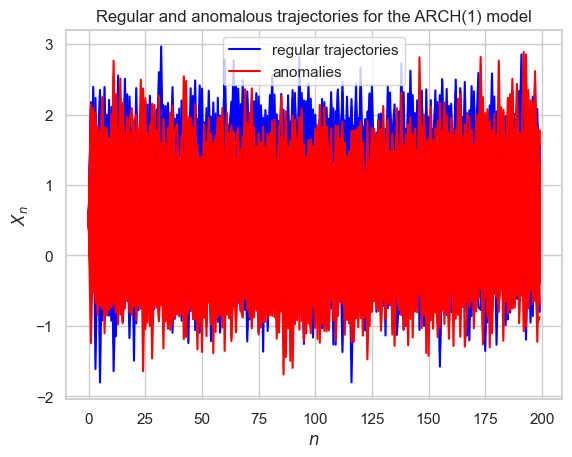

In [11]:
# Plot regular trajectories
for i, trajectory in enumerate(regular_arch_trajectories):
    if i == 0:
        plt.plot(trajectory, color="blue", label="regular trajectories")
    else:
        plt.plot(trajectory, color="blue")

for i, trajectory in enumerate(anomalous_perturbed_mean_arch_trajectories):
    if i == 0:
        plt.plot(trajectory, color="red", label="anomalies", alpha=1)
    else:
        plt.plot(trajectory, color="red", alpha=1)
plt.title("Regular and anomalous trajectories for the ARCH(1) model")
plt.legend()
plt.xlabel(r"$n$")
plt.ylabel(r"$X_n$")
plt.show()

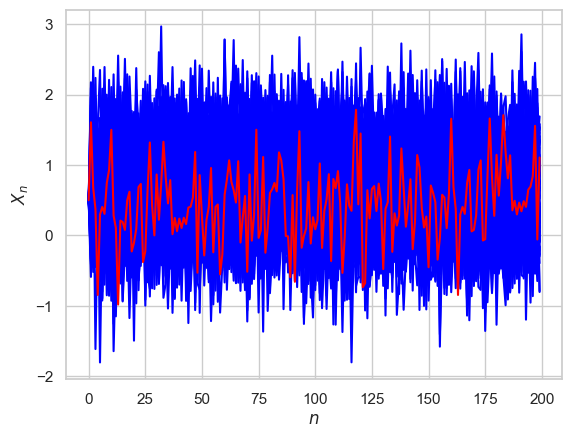

In [12]:
# Plot regular trajectories
for i, trajectory in enumerate(regular_arch_trajectories):
    plt.plot(trajectory, color="blue")

plt.plot(anomalous_perturbed_mean_arch_trajectories[0], color="red", alpha=1)

plt.xlabel(r"$n$")
plt.ylabel(r"$X_n$")
plt.show()

## Model 3 (increasing volatility)

In [13]:
# Simulate anomalous process
random_seed +=1
anomalous_increasing_volatility_arch_trajectories = simulate_arch1_process_with_dynamic_anomaly(
    n_steps=n_steps, 
    m=mean_fn, 
    sigma=volatility_fn,
    anomalous_m=mean_fn,
    anomalous_sigma=increasing_volatility_fn,
    initial_value=INITIAL_VALUE, 
    num_processes=A,
    seed=random_seed,
    anomaly_size=ANOMALY_SIZE,
)

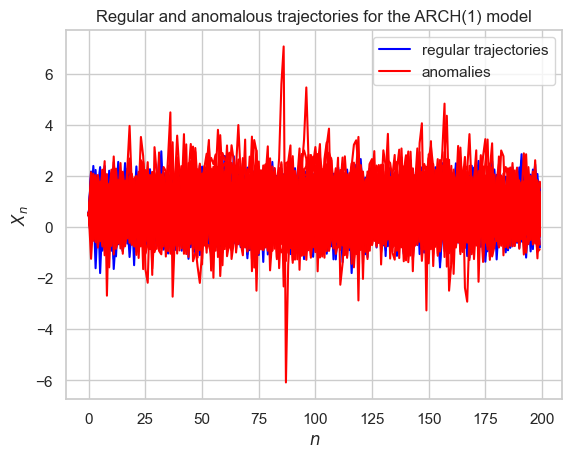

In [14]:
# Plot regular trajectories
for i, trajectory in enumerate(regular_arch_trajectories):
    if i == 0:
        plt.plot(trajectory, color="blue", label="regular trajectories")
    else:
        plt.plot(trajectory, color="blue")

for i, trajectory in enumerate(anomalous_increasing_volatility_arch_trajectories):
    if i == 0:
        plt.plot(trajectory, color="red", label="anomalies", alpha=1)
    else:
        plt.plot(trajectory, color="red", alpha=1)
plt.title("Regular and anomalous trajectories for the ARCH(1) model")
plt.legend()
plt.xlabel(r"$n$")
plt.ylabel(r"$X_n$")
plt.show()

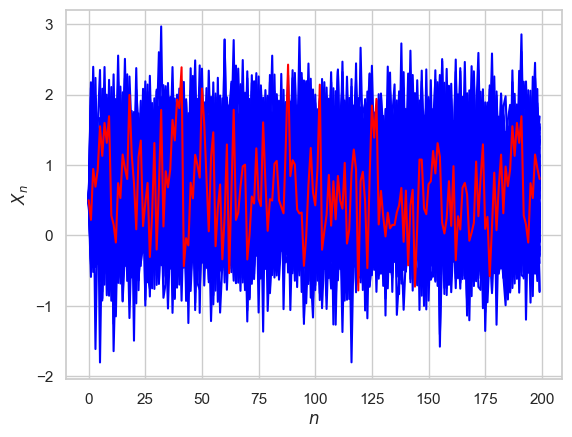

In [15]:
# Plot regular trajectories
for i, trajectory in enumerate(regular_arch_trajectories):
    plt.plot(trajectory, color="blue")

plt.plot(anomalous_increasing_volatility_arch_trajectories[1], color="red", alpha=1)

plt.xlabel(r"$n$")
plt.ylabel(r"$X_n$")
plt.show()

## Model 4 (Deterministic mean)

In [16]:
# Simulate anomalous process
random_seed +=1
anomalous_constant_mean_arch_trajectories = simulate_arch1_process_with_dynamic_anomaly(
    n_steps=n_steps, 
    m=mean_fn, 
    sigma=volatility_fn, 
    anomalous_m=constant_mean,
    anomalous_sigma=volatility_fn,
    initial_value=INITIAL_VALUE, 
    num_processes=A,
    seed=random_seed,
    anomaly_size=ANOMALY_SIZE,
)

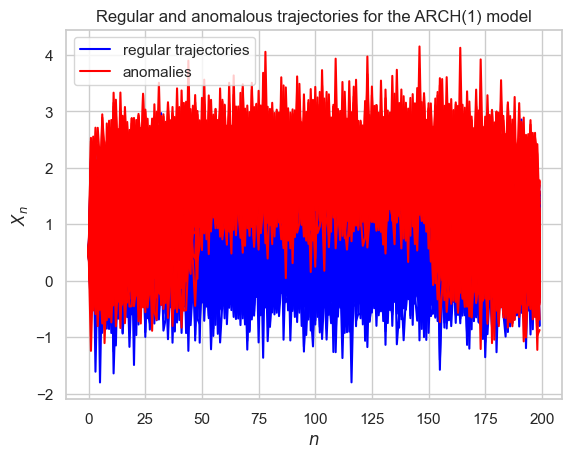

In [17]:
# Plot regular trajectories
for i, trajectory in enumerate(regular_arch_trajectories):
    if i == 0:
        plt.plot(trajectory, color="blue", label="regular trajectories")
    else:
        plt.plot(trajectory, color="blue")

for i, trajectory in enumerate(anomalous_constant_mean_arch_trajectories):
    if i == 0:
        plt.plot(trajectory, color="red", label="anomalies", alpha=1)
    else:
        plt.plot(trajectory, color="red", alpha=1)
plt.title("Regular and anomalous trajectories for the ARCH(1) model")
plt.legend()
plt.xlabel(r"$n$")
plt.ylabel(r"$X_n$")
plt.show()

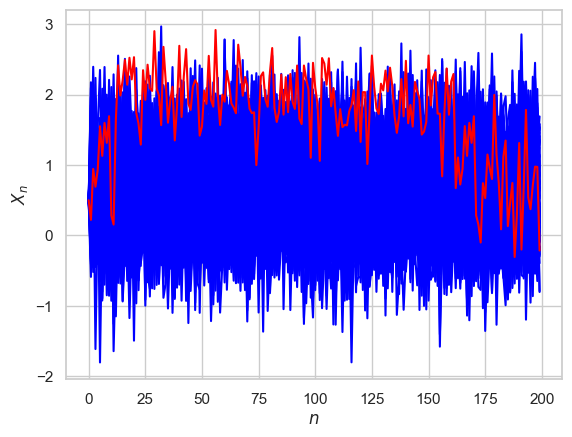

In [18]:
# Plot regular trajectories
for i, trajectory in enumerate(regular_arch_trajectories):
    plt.plot(trajectory, color="blue")

plt.plot(anomalous_constant_mean_arch_trajectories[0], color="red", alpha=1)

plt.xlabel(r"$n$")
plt.ylabel(r"$X_n$")
plt.show()